# Keras Image Augmentation API

Like the rest of Keras, the image augmentation API is simple and powerful.

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. 

This includes capabilities such as:

- Sample-wise standardization.
- Feature-wise standardization.
- ZCA whitening.
- Random rotation, shifts, shear and flips.
- Dimension reordering.
- Save augmented images to disk.

# 1. Feature Standardization

It is also possible to standardize pixel values across the entire dataset. 

This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

You can perform feature standardization by setting the featurewise_center and featurewise_std_normalization arguments on the ImageDataGenerator class. 

These are in fact set to True by default and creating an instance of ImageDataGenerator with no arguments will have the same effect.

In [9]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array,load_img
from matplotlib import pyplot
%matplotlib inline

/home/hardik/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/home/hardik/.local/lib/python3.6/site-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


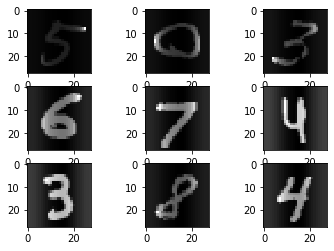

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)



X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

# 2. ZCA Whitening

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

/home/hardik/.local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


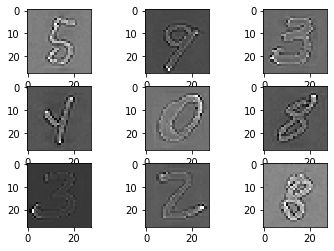

In [4]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

# 3. Random Rotations

Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

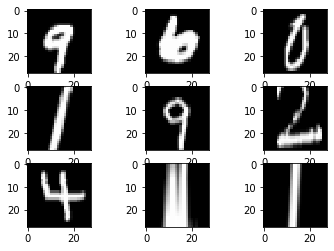

In [5]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

# 4. Random Shifts

Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data.

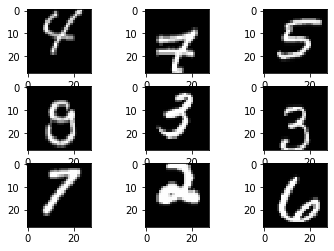

In [6]:

datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
# fit parameters from data
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

# 5. Random Flips

Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data.

Keras supports random flipping along both the vertical and horizontal axes using the vertical_flip and horizontal_flip arguments.

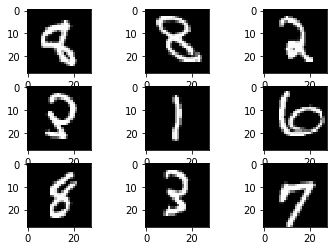

In [7]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()
    break

# 6. Saving Augmented Images to File

The data preparation and augmentation is performed just in time by Keras.

This is efficient in terms of memory, but you may require the exact images used during training. For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple different deep learning models or configurations.

Keras allows you to save the images generated during training. The directory, filename prefix and image file type can be specified to the flow() function before training. Then, during training, the generated images will be written to file.

In [10]:
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
img= load_img("/home/hardik/Desktop/MACHINE LEARNING A-Z/OUTPUTS/test image.jpg")
x=img_to_array(img)
x=x.reshape((1,) + x.shape) #concatinating to get shape as(1, row,column,color)
count=0
for batch in datagen.flow(x,batch_size=1,save_to_dir="/home/hardik/Desktop/MACHINE LEARNING A-Z/OUTPUTS",save_prefix="data aug",save_format="jpg"):
    count+=1
    if count>5:
        break;

 # after data augmentation we have to use following method to fit the model rather than using *model.fit()* only.
 
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=4),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)